# IFT6269 - Homework 2 - Linear Classification

**Due**: Tuesday, October 13, 2020

#### Name: Abdelhakim Abdellaoui
#### Student ID:20198539
#### Collaborators: 



### Introduction

In this assignment you will compare the performance of several algorithm on some synthetic classification tasks. The assignment consists of two parts: 1) a derivation of the estimators for the Fisher LDA with general covariance matrix derivation and 2) the implementation of several classification algorithms.

### Tasks
0.   Get your own copy of this file via "File > Save a copy in Drive...",
1.   Fill your personal information and collaborators at the top of this assignment, and rename the notebook accordingly, e.g., `hw2_thomasBayes.ipynb`
2.   Read the instructions provided on each section and cell carefully,
3.   Answer the section **Math Questions on Fisher LDA**,
4.   Implement the requested algorithms in section **Playground** following the example provided in dummy_model`,
5.   In section **Model Comparison**, for each of the datasets:
    *   use the training data to estimate the parameters of each of the 4 algorithms,
    *   plot the corresponding estimated decision boundary and the training set using the function `plot_results`, 
    *   compute the training and test accuracy and fill the table in each section by hand,
    *   compare the performance of each of the algorithms and provide an explanation for your observations based on, for example, their accuracy, overfitting/generalization properties, whether the assumptions of each algorithms are satisfied by the data, etc. 
    
**Important**: You are allowed to collaborate with other students in both the math and coding parts of this assignment. However, the answers provided here must reflect your individual work. For that reason, you are not allowed to share this notebook, except for your submission to the TA for grading. **Don't forget to pin and save the version of the notebook you want to be graded on!**

In [ ]:
!wget http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
!unzip hwk2data.zip

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.style.use('seaborn-white')

--2020-10-12 22:18:33--  http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70575 (69K) [application/zip]
Saving to: ‘hwk2data.zip.2’

hwk2data.zip.2      100%[===================>]  68.92K   396KB/s    in 0.2s    

2020-10-12 22:18:33 (396 KB/s) - ‘hwk2data.zip.2’ saved [70575/70575]

Archive:  hwk2data.zip
replace hwk2data/classificationA.test? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

You get 3 different datasets (**A**, **B**, **C**) with a training and test set for each, i.e., 6 sets in total. Each row represents a sample of data $(x_i, y_i)$. There are three columns: the first two give the coordinates for $x_i \in \mathbb{R}^2$; the third column gives the class label $y_i \in \{0, 1\}$. The datasets are all generated from some kind of mixture of Gaussians generative model. The train and test sets are generated from the same distribution for each types of dataset. 

To help your interpretation, we give you the actual
generating process. However, keep in mind that normally we would not know the information about the generating process. In this
assignment, we will compare different classification approaches.
*  **Dataset A**: the class-conditionals for this dataset are Gaussians with different means, but with a shared covariance matrix $\Sigma$.
*  **Dataset B**: similar generating process but the covariance matrices are different for the two classes.
*  **Dataset C**: here one class is a mixture of two Gaussians, while the other class is a single Gaussian (with no sharing).

Test the different models learnt from the corresponding training data on these test data. Compute for each model the accuracy (i.e.  the fraction of the data correctly classified) on the training set and compute it as well for the test set. And compare the performances of the different methods on the three datasets.


In [ ]:
data = {}

for d_ix in ["A", "B", "C"]:
    for t_flag in ["train", "test"]:
        data[t_flag + "_" + d_ix] = np.loadtxt("/content/hwk2data/classification"+d_ix+"."+t_flag)

### Models

**Fisher LDA**
>  We first consider the Fisher LDA model as seen in class: given the class variable, the data are assumed to be Gaussians with different means for different classes but with the same covariance matrix: $Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma)$.

**Logistic Regression**
>  Implement logistic regression for an affine function $f(x) = w^Tx+b$ (do not forget the constant term – you can use the bias feature trick) using the IRLS algorithm (Newton’s method) which was described in class. Hint: never compute the matrix inverse by itself – this is not numerically stable when the Hessian might become ill-conditioned.

**Linear regression**

> As mentioned in class, we can forget that the class $y$ can only take the two values $0$ or $1$ and think of it as a real-valued variable on which we can do standard linear regression (least-squares). Here, the Gaussian noise model on $y$ does not make any sense from a generative point of view; but we can still do least-squares to estimate the parameters of a linear decision boundary (you’ll be surprised by its performance despite coming from a “bad”
generative model!). Implement linear regression (for an affine function $f(x) = w^Tx + b$) by solving the normal equations on each dataset (with no regularization).


**QDA**
>  We finally relax the assumption that the covariance matrices for the two classes are the same. So, given the class label, the data are now assumed to be Gaussian with means and covariance matrices which are a priori different:
$Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma_j)$.

## Math Questions on Fisher LDA

This week's math questions will be typed directly in this notebook, i.e., no scanned hand-written answers accepted! You can use standard $\LaTeX$ sintax here!



**Question A:** Derive the form of the maximum likelihood estimator for the Fisher LDA model described above. Hint: you can re-use some of the tricks presented in class for the MLE of a multivariate Gaussian, but adapted to this setting. You can get inspiration from Section 7.2 in Mike’s book (which covers the case where $\Sigma$ is diagonal).

**Answer:**

As described above for the class conditional :  $p(x|y_{k})=\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x-\mu_{k})^T \Sigma^{-1}(x-\mu_{k}))$  and $p(y)=\pi^y (1-\pi)^{1-y}$

The expression of the likelihood is the following:

$l(\pi,\mu_{0},\mu_{1},\Sigma)=log\prod_{i=1}^{n}p(x_{i},y_{i};\pi,\mu_{0},\mu_{1},\Sigma)=log \prod_{i=1}^{n}p(x_{i}|y_{i};\pi,\mu_{0},\mu_{1},\Sigma)p(y_{i};\pi)$\\

 There are two classes, $k \in \{0,1\}$ depending on the value of $y_{i}$ we can put: $k=1\{y_{i}=1\}$ and $1$ is the indicator function.

So we can represent the likelihood as:

$l(\pi,\mu_{k},\Sigma)=log\prod_{i=1}^{n}p(x_{i}|y_{i};\pi,\mu_{k},\Sigma)p(y_{i};\pi)=\\
log\prod_{i=1}^{n}\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x_{i}-\mu_{k})^T \Sigma^{-1}(x_{i}-\mu_{k}))\pi^{y_{i}}(1-\pi)^{1-y_{i}}=\\
\sum_{i=1}^{n} -\frac{n}{2}log(2\pi)-\frac{1}{2}log(|\Sigma|)-\frac{1}{2}(x_{i}-\mu_{k})^T \Sigma^{-1}(x_{i}-\mu_{k})+y_{i}log(\pi)+(y_{i}-1)log(1-\pi)$\\ 

This is the form of the likelihood.Let's find now the parameters of the likelihood:

$\textbf{1 -}$ For $\pi$:

$\hat{\pi}=argmax_{\pi}l(\pi,\mu_{k},\Sigma)$

$ \frac{\partial }{\partial \pi}l(\pi,\mu_{k},\Sigma)=0$ \\

$\sum_{i=1}^{n} \frac{y_{i}}{\pi}-\frac{1-y_{i}}{1-\pi}=\sum_{i=1}^{n} y_{i}(1-\pi)-(1-y_{i}){\pi}=\sum_{i=1}^{n} y_{i}-{\pi}=0$

$\hat{\pi}=\frac{\sum_{i=1}^{n}y_{i}}{n}$

$\textbf{2 -}$  For $\mu_{k}$:

$\hat{\mu_{k}}=argmax_{\mu_{k}}l(\pi,\mu_{k},\Sigma)$

$\frac{\partial }{\partial \mu_{k}}l(\pi,\mu_{k},\Sigma)=0$ \\

$\sum_{i=1}^{n} \frac{\partial }{\partial \mu_{k}}(-\frac{1}{2}(x_{i}-\mu_{k})^T \Sigma^{-1}(x_{i}-\mu_{k}))=0$

We know that $\frac{\partial }{\partial \alpha}\alpha^{T}X\alpha=2\alpha^{T}X$

So wee put $\alpha=(x_{i}-\mu_{k})$ So:

$\frac{\partial }{\partial \mu_{k}}l(\pi,\mu_{k},\Sigma)=\frac{\partial l(\pi,\mu_{k},\Sigma) }{\partial \alpha}\frac{\partial \alpha }{\partial \mu_{k}}=\sum_{i=1}^{n} \frac{\partial }{\partial \mu_{k}}(-\frac{1}{2}\times 2(x_{i}-\mu_{k})^T \Sigma^{-1})\frac{\partial \alpha }{\partial \mu_{k}} =0$

We know that $\frac{\partial \alpha }{\partial \mu_{k}}=\left\{
    \begin{array}{ll}
        \ -1 \,\,if\,\, y_{i}=k \\
        \ 0 \,\,else \\
    \end{array}
 \right \} =-1\{ y_{i}=k \}$ So :

 $\frac{\partial }{\partial \mu_{k}}l(\pi,\mu_{k},\Sigma)=\sum_{i=1}^{n} x_{i}\frac{\partial \alpha }{\partial \mu_{k}}-\mu_{k}\frac{\partial \alpha }{\partial \mu_{k}} =0$ ,so using the indicator function we get:

$\hat\mu_{k}=\frac{\sum_{i=1}^{n} 1\{ y_{i}=k \}x_{i}}{\sum_{i=1}^{n} 1\{ y_{i}=k \}}$

So for $k \in \{0,1\}$ we have:

$\hat\mu_{0}=\frac{\sum_{i=1}^{n} 1\{ y_{i}=0 \}x_{i}}{\sum_{i=1}^{n} 1\{ y_{i}=0 \}}$ and $\hat\mu_{1}=\frac{\sum_{i=1}^{n} 1\{ y_{i}=1 \}x_{i}}{\sum_{i=1}^{n} 1\{ y_{i}=1 \}}$


 $\textbf{3 -}$ For $\Sigma$:


$\hat{\Sigma}=argmax_{\Sigma}l(\pi,\mu_{k},\Sigma)$

$\frac{\partial }{\partial \Sigma}l(\pi,\mu_{k},\Sigma)=0$ \\

$\frac{\partial }{\partial \Sigma}(-\frac{1}{2}log(|\Sigma|)-\frac{1}{2}(x_{i}-\mu_{k})^T \Sigma^{-1}(x_{i}-\mu_{k}))=-\frac{1}{2}\frac{\partial }{\partial \Sigma}log(|\Sigma|)-\frac{1}{2}\frac{\partial }{\partial \Sigma}(x_{i}-\mu_{k})^T \Sigma^{-1}(x_{i}-\mu_{k})=0$

As known : $\frac{\partial }{\partial X}log(|X|)=X^{-T}$ and $\frac{\partial }{\partial X}a^{T}X^{-1}b=-X^{-T}ab^{T} X^{-T}$ \\
$\Rightarrow \sum_{i=1}^{n} -\frac{1}{2}\Sigma^{-T}+\frac{1}{2}\Sigma^{-T}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T} \Sigma^{-T}=0$

Taking out  $-\frac{1}{2}\Sigma^{-T}$ from the equation above so:
$\Rightarrow \sum_{i=1}^{n} 1-\Sigma^{-T}(x_{i}-\mu_{k})(x-\mu_{k})^{T}=0 $

$\Rightarrow n\Sigma=\sum_{i=1}^{n} (x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T} $
$\Rightarrow \Sigma=\frac{1}{n}\sum_{i=1}^{n} (x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T} $ where $k=1\{y_{i}=1\}$



Verifying that this solution is a global maximum for maximum likelihood:

We know that in one dimension for a vector $X$ that for $y \neq \hat{X}$: $\sum_{1}^{n}(x_{i}-y) >\sum_{1}^{n}(x_{i}-\hat{X})$ 

So we conclude $\sum_{1}^{n}(x_{i}-\mu_{k}) >\sum_{1}^{n}(x_{i}-\hat{\mu_{k}})$ for $\mu_{k} \neq \hat{\mu_{k}}$

Then, for each $\sigma$ we have :
$\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x-\hat{\mu_{k}})^T \Sigma^{-1}(x-\hat{\mu_{k}})) >\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }} exp(-\frac{1}{2}(x-\mu_{k})^T \Sigma^{-1}(x-\mu_{k}))$

And as,$\hat\pi^y (1-\hat\pi)^{1-y} \geq \pi^y (1-\pi)^{1-y}$ (because $\hat\pi$) is a maximum ,second derivate is negative for $\pi$)

So :


$\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x-\hat{\mu_{k}})^T \Sigma^{-1}(x-\hat{\mu_{k}}))\hat\pi^y (1-\hat\pi)^{1-y} \geq \frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x-\mu_{k})^T \Sigma^{-1}(x-\mu_{k}))\pi^y (1-\pi)^{1-y}$

Hence ,we have reduced the problem to one dimensional one ,let's verify that :

$\frac{1}{{(2\pi) ^\frac{n}{2} |\Sigma|^\frac{1}{2} }}exp(-\frac{1}{2}(x-\hat{\mu_{k}})^T \Sigma^{-1}(x-\hat{\mu_{k}}))\hat\pi^y (1-\hat\pi)^{1-y}$ reach its maximum at $\hat\Sigma=\frac{1}{n}\sum_{i=1}^{n} (x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T} $
By calculating the second derivative for the log  of this quantity (we have already the first derivative) we conclude that it is negative ) So the solution found is a global maximum






 







**Question B:** What is the form of the conditional distribution $p(y = 1|x)$? Compare with the form of logistic regression

**Answer:** 

We know that according to Bayes rule $p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x)}=\frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}=\frac{1}{1+\frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}}$\\
$=\frac{1}{1+\frac{exp(-\frac{1}{2}(x-\mu_{0})^T \Sigma^{-1}(x-\mu_{0})+log(\pi))}{exp(-\frac{1}{2}(x-\mu_{1})^T \Sigma^{-1}(x-\mu_{1})+log(1-\pi))}}=\frac{1}{1+exp(\frac{1}{2}(x-\mu_{1})^T \Sigma^{-1}(x-\mu_{1}))-\frac{1}{2}(x-\mu_{0})^T \Sigma^{-1}(x-\mu_{0})+log(\frac{\pi}{1-\pi}))}=\frac{1}{1+exp(-(\mu_{1}-\mu_{0})^{T}\Sigma^{-1}x +(\mu_{1}-\mu_{0})^{T}\Sigma^{-1}(\mu_{1}-\mu_{0})+log(\frac{\pi}{1-\pi}))}$

We can put $W=-\Sigma^{-1}(\mu_{1}-\mu_{0})$ and $b=(\mu_{1}-\mu_{0})^{T}\Sigma^{-1}(\mu_{1}-\mu_{0})+log(\frac{\pi}{1-\pi})$ So:
$p(y=1|x)=\frac{1}{1+exp(W^{T}x+b)}$


So the form of the conditional distribution is a sigmoid function ,it has the same form as the one of logistic regression.

## Playground

You are allowed to add as many cells and functions as you wish in this section, but not allowed to change the signature (name and inputs) of the functions! 

In [ ]:
def dummy_model(X, y):
    
    """
    This is a dummy model to show you how your solution is expected to look like
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            dummy_classifier: dummy classification function
    """
    
    # Just computing some means and standard deviations, nothing fancy
    mu0, mu1 = X[:, 0].mean(), X[:, 1].mean()
    s0, s1 = X[:, 0].std(), X[:, 1].std()
    
    
    def dummy_classifier(x0, x1):
        # Note how we use the variables mu0, mu1, s0 and s1 computed from the data
        # to define this function. Their values get stored in the definition
        # of the function itself, meaning that we don't have to store them explicitly.
        return 0.5 * (1 + np.tanh((x0 - mu0)**2/s0 - (x1 - mu1)**2/s1))
    
    return dummy_classifier

In [ ]:
def LDA(X, y):
  #Estimating parameters :
  #Estimating pi:
  def calculate_pi(y):
    m =y.shape[0]
    return sum(y)/m
  #Estimating mu_1:
  def calculate_mu_1(X,y):
    class_dist=np.array([1 if y[i]==1 else 0 for i in range(y.shape[0])])
    mean_list=[]
    for i in range(X.shape[1]):
      var=sum(X[:,i]*class_dist)
      mean_list.append(var/sum(class_dist))
    return np.array(mean_list)
  #Estimating mu_0:
  def calculate_mu_0(X,y):
    class_dist=np.array([1 if y[i]==0 else 0 for i in range(y.shape[0])])
    mean_list=[]
    for i in range(X.shape[1]):
      var=sum(X[:,i]*class_dist)
      mean_list.append(var/sum(class_dist))
    return np.array(mean_list)
  #Estimating Sigma:
  def calculate_sigma(X,y):
    mu_0=calculate_mu_0(X,y)
    mu_1=calculate_mu_1(X,y)
    mean_dist=np.array([mu_0 if y[i]==0 else mu_1 for i in range(y.shape[0])])
    m=X.shape[0]
    diff=X-mean_dist
    diff=np.array(diff)
    s1,s2,s3,s4=0,0,0,0
    for i in range(X.shape[0]):
      diff_i=np.array(diff[i])[np.newaxis]
      sigma_i=diff_i.T @ diff_i
      s1+=sigma_i[0][0]/m
      s2+=sigma_i[0][1]/m
      s3+=sigma_i[1][0]/m
      s4+=sigma_i[1][1]/m
    sigma=np.array([[s1,s2],[s3,s4]])
    return sigma
  #Values of all parameters
  pi=calculate_pi(y)
  sigma=calculate_sigma(X,y)
  mu_0=calculate_mu_0(X,y)
  mu_1=calculate_mu_1(X,y)
  def LDA_classifier(x0, x1):
    x=np.array([x0,x1])
    numerator=multivariate_normal.pdf(x, mean=mu_1, cov=sigma)*pi
    denominator=multivariate_normal.pdf(x, mean=mu_1, cov=sigma)*pi+multivariate_normal.pdf(x, mean=mu_0, cov=sigma)*(1-pi)
    return numerator/denominator
    
  return LDA_classifier

def LogReg(X, y):
  #Estimating parameters:
  #Sigmoid function:
  def sigmoid(x_1,x_2, w_1, w_2,b):
    z = (w_1*x_1 + w_2*x_2+b).astype("float_")                                        
    return 1/ (1+ np.exp(-z))
  #Likelihood function:
  def log_likelihood(X_1,X_2,y, w_1, w_2,b):                                                                
    sigmoid_values = sigmoid(X_1,X_2,w_1, w_2,b)                                        
    return np.sum(y * np.log(sigmoid_values)
                + (1 - y) * np.log(1 - sigmoid_values)) 
  #Gradient function
  def gradient(X_1,X_2,y, w_1, w_2,b):                                                         
    sigmoid_values = sigmoid(X_1,X_2, w_1, w_2,b)                                        
    return np.array([[np.sum((y - sigmoid_values) * X_1),np.sum((y - sigmoid_values) * X_2),                     
                    np.sum((y - sigmoid_values) * 1)]])                         
  #hessian function:
  def hessian(X_1,X_2,y, w_1, w_2,b):                                                          
      sigmoid_probs = sigmoid(X_1,X_2, w_1, w_2,b)                                        
      d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * X_1 * X_1) 
      d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * X_1 * X_2)
      d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * X_1 * 1)  
      d4 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * X_2 * X_2)
      d5 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * X_2 * 1)                                    
      d6 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)              
      H = np.array([[d1, d2,d3],[d2,d4,d5],[d3,d5,d6]])                                           
      return H
  #Newton function to estimate parameters:
  def newtons_method(X_1,X_2,y):                                                             
      # Initialize log_likelihood & parameters: I have tested many starting points ,the one above gives the best results (w_1 =20,w_2 =20,b=1 )                                                              
      w_1 =20                                                                  
      w_2 =20
      b=1                                                             
      Delta_l = np.Infinity                                                                
      l = log_likelihood(X_1,X_2,y, w_1, w_2,b)                                                                 
      # Convergence Conditions                                                        
      δ = .0000000001                                                                 
      max_iterations =1000                                                         
      i = 0                                                                           
      while abs(Delta_l) > δ and i < max_iterations:                                       
          i += 1                                                                      
          g = gradient(X_1,X_2,y, w_1, w_2,b)                                                      
          hess = hessian(X_1,X_2,y, w_1, w_2,b)
          #Calculating the inverse through IRLS method
          Delta= np.linalg.lstsq(hess,g.T )                                                                                             
          Delta_w_1 = Delta[0][0]                                                            
          Delta_w_2 = Delta[0][1]
          Delta_b = Delta[0][2]                                                                                                                                      
          # Perform the update step                                                    
          w_1 += Delta_w_1                                                                 
          w_2 += Delta_w_2 
          b+= Delta_b                                                                                                                                  
          # Update the log-likelihood at each iteration                                     
          l_new = log_likelihood(X_1,X_2,y, w_1, w_2,b)                                                      
          Delta_l = l - l_new                                                           
          l = l_new                                                                
      return np.array([w_1,w_2,b])
  #After looping ,getting the parameters values
  w=newtons_method(X[:,0],X[:,1],y)
  def LogReg_classifier(x0, x1):
    # TODO: use the variables estimated above to define p(y=1|(x0, x1))
    return sigmoid(x0,x1, w[0][0], w[1][0],w[2][0])
  return LogReg_classifier


def LinReg(X, y):
    #Solving the normal equation
    A=np.array([1 for i in range(X.shape[0])])
    X=np.hstack((X, np.atleast_2d(A).T))
    M=X.T @ X
    N=X.T @ y
    #Getting the parameters through the IRLS method
    w=np.linalg.lstsq(M,N.T )
    def LinReg_classifier(x0, x1):
         # TODO: use the variables estimated above to implement f(x0, x1)
        return w[0][0]*x0+w[0][1]*x1+w[0][2]
    
    return LinReg_classifier


def QDA(X, y):
  #Estimating parameters:
  #Estimating pi:
  def calculate_pi(y):
    m =y.shape[0]
    return sum(y)/m
  #Estimating mu_1:
  def calculate_mu_1(X,y):
    class_dist=np.array([1 if y[i]==1 else 0 for i in range(y.shape[0])])
    mean_list=[]
    for i in range(X.shape[1]):
      var=sum(X[:,i]*class_dist)
      mean_list.append(var/sum(class_dist))
    return np.array(mean_list)
  #Estimating mu_0:
  def calculate_mu_0(X,y):
    class_dist=np.array([1 if y[i]==0 else 0 for i in range(y.shape[0])])
    mean_list=[]
    for i in range(X.shape[1]):
      var=sum(X[:,i]*class_dist)
      mean_list.append(var/sum(class_dist))
    return np.array(mean_list)
  #Estimating sigma_0:
  def calculate_sigma_0(X,y):
    mu_0=calculate_mu_0(X,y)
    X_class=np.array([X[i] for i in range(y.shape[0]) if y[i]==0 ])
    m=X_class.shape[0]
    mean_dist=np.array([mu_0 for i in range(m)])
    diff=X_class-mean_dist
    diff=np.array(diff)
    s1,s2,s3,s4=0,0,0,0
    for i in range(m):
      diff_i=np.array(diff[i])[np.newaxis]
      sigma_i=diff_i.T @ diff_i
      s1+=sigma_i[0][0]/m
      s2+=sigma_i[0][1]/m
      s3+=sigma_i[1][0]/m
      s4+=sigma_i[1][1]/m
    sigma_0=np.array([[s1,s2],[s3,s4]])
    return sigma_0
  #Estimating sigma_1:
  def calculate_sigma_1(X,y):
    mu_1=calculate_mu_1(X,y)
    X_class=np.array([X[i] for i in range(y.shape[0]) if y[i]==1])
    m=X_class.shape[0]
    mean_dist=np.array([mu_1 for i in range(m)])
    diff=X_class-mean_dist
    diff=np.array(diff)
    s1,s2,s3,s4=0,0,0,0
    for i in range(m):
      diff_i=np.array(diff[i])[np.newaxis]
      sigma_i=diff_i.T @ diff_i
      s1+=sigma_i[0][0]/m
      s2+=sigma_i[0][1]/m
      s3+=sigma_i[1][0]/m
      s4+=sigma_i[1][1]/m
    sigma_1=np.array([[s1,s2],[s3,s4]])
    return sigma_1 
  #Parameters values:
  pi=calculate_pi(y)
  sigma_0=calculate_sigma_0(X,y)
  sigma_1=calculate_sigma_1(X,y)
  mu_0=calculate_mu_0(X,y)
  mu_1=calculate_mu_1(X,y)
  def QDA_classifier(x0, x1):
    x=np.array([x0,x1])
    numerator=multivariate_normal.pdf(x, mean=mu_1, cov=sigma_1)*pi
    denominator=multivariate_normal.pdf(x, mean=mu_1, cov=sigma_1)*pi+multivariate_normal.pdf(x, mean=mu_0, cov=sigma_0)*(1-pi)
        # TODO: use the variables estimated above to implement p(y=1|(x0, x1))
    return numerator/denominator
  
  return QDA_classifier


## Model Comparison

You are allowed to change the cell contents unless explicitly noted otherwise. Use the provided cells to type your answers and fill the tables.

### Code for plotting results

In [ ]:
# ----------------------------------------------------------------------- #
#                      Do NOT modify this cell
# ----------------------------------------------------------------------- #

def pointwise_eval(f, umatrix, vmatrix):
    """
    Evaluates the function f over a grid given by the matrices u and V
        
        Inputs:
            f: [callable] function (of two scalar inputs) to be evaluated
            u: [n x m] matrix of values for the first input
            v: [n x m] matrix of values for the second input
                    
        Returns:
            z: [n x m] matrix of function values f(u_ij, v_ij) for i \in [1..n], j \in [1..m]
    """
    n, m = umatrix.shape
    z = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
          z[i, j] = f(umatrix[i, j], vmatrix[i,j])
    return z
    
def plot_results(X, y, classifiers):
    """
    Displays the behavior of the several classifiers via a 2x2 subplot.
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
            classifiers: [4] list of functions in EXACTLT the following order:
                         ["LDA", "LogReg", "LinReg", "QDA"]
                         
        Output:
            2x2 subplot with showing a scatter plot of the data, a contour plot 
            for each classifier function and the level set f(x)=0.5 in black. 
        
    """
    
    assert len(classifiers) == 4
    
    labels = ["LDA", "LogReg", "LinReg", "QDA"]
    
    # Find range in each dimension and setup a meshgrid
    x0_list = np.linspace(X[:, 0].min(), X[:, 0].max(), 250)
    x1_list = np.linspace(X[:, 1].min(), X[:, 1].max(), 250)
    x0_v, x1_v = np.meshgrid(x0_list, x1_list, sparse=False, indexing='ij')
    
    # Create 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    (ax1, ax2), (ax3, ax4) = axs
    
    for ix, ax in enumerate([ax1, ax2, ax3, ax4]):
        
        # Take an individual classifier
        f = classifiers[ix]
        
        if not f is None:
            
            # Evaluate over the meshgrid and plot contour lines
            # Z = f(x0_v, x1_v) # This is old code!!
            Z = pointwise_eval(f, x0_v, x1_v)
            contours = ax.contourf(x0_v, x1_v, Z, 5, cmap='RdBu', alpha=0.2);
            ax.clabel(contours, inline=True, fontsize=10)
            ax.contour(x0_v, x1_v, Z, [0.5], colors='black');

            # Plot the labelled data on top
            ax.scatter(X[y==0, 0], X[y==0, 1], marker="x", c='r');
            ax.scatter(X[y==1, 0], X[y==1, 1], marker="o", facecolors='none', edgecolors='b');
            ax.set_title(labels[ix])

In [ ]:
#Function to calculate classifiers accuracy for a specific dataset:
def calculate_accuracy(classifiers,X,y):
  D={}
  for j,classifier in enumerate(classifiers):
    z=pointwise_eval(classifier,X[:,0].reshape(X.shape[0],1),X[:,1].reshape(X.shape[0],1))
    z_class=[1 if z[i][0]>=0.5 else 0 for i in range(z.shape[0])]
    accuracy_vector=[1 if z_class[i]==y[i] else 0 for i in range(z.shape[0])]
    D[j +1]=sum(accuracy_vector)/z.shape[0]
  return D


### Dataset A

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

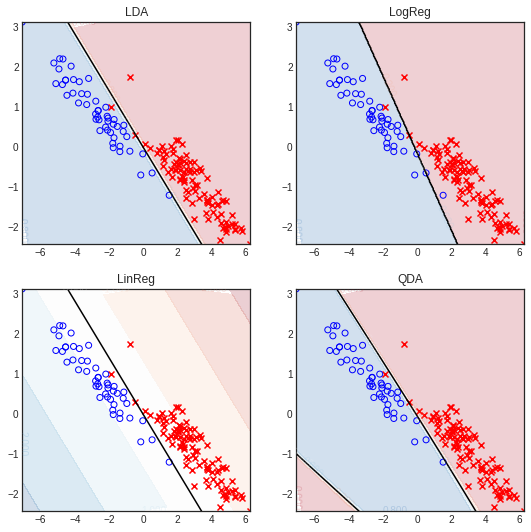

In [ ]:
X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]


# Note that by setting some of the entries to None you can implement and test each
# of the methods one by one.

# You can erase the following TWO lines once you are comfortable with the codebase.
classifiers= [LDA(X_train, y_train),LogReg(X_train, y_train),LinReg(X_train, y_train),QDA(X_train, y_train)]
plot_results(X_train, y_train,classifiers)
# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

# classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
# plot_results(X_train, y_train, classifiers)

#### Comparison


In [ ]:
#Train,and test accuracy:
X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]
classifiers=[model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
print(calculate_accuracy(classifiers,data["train_A"][:, 0:2], data["train_A"][:, -1]))
print(calculate_accuracy(classifiers,data["test_A"][:, 0:2], data["test_A"][:, -1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

{1: 0.9866666666666667, 2: 0.9733333333333334, 3: 0.9866666666666667, 4: 0.9933333333333333}
{1: 0.98, 2: 0.9826666666666667, 3: 0.9793333333333333, 4: 0.98}


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 98.66 % | 98 %
*LogReg* | 97.33 % | 98.26 %
*LinReg* | 98.66 % | 97.93 %
*QDA* | 99.33 % | 98 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:**

In general the misclassification error on both training and test dataset are very close, and that could be interpreted by the fact that the two databases have the same generation process (Gaussian distribution for both classes). But as remarked QDA yields highest accuracy on the training dataset because it has the most flexible decision boundary in comparison to other classifiers, however, it overfits a little bit for the test dataset because the assumption of no shared covariance is violated, while LDA it maintains almost the same accuracy on both training and test datasets since the shared covariance assumption is respected, and the same thing for other classifiers LinReg and LogReg which does not assume any specific shapes of densities in the space of predictor variables.

**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**


- All methods yields almost similar results with small deviations.
We can say that LDA gives the best result taking into account the two datasets (training and test) because all its assumptions are verified. While QDA gives the best result only on the training dataset and we can consider that as an overfiting in somehow because the assumption of no shared covariance is not respected.
- LinReg gives good results even though its assumptions are violated.



### Dataset B

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

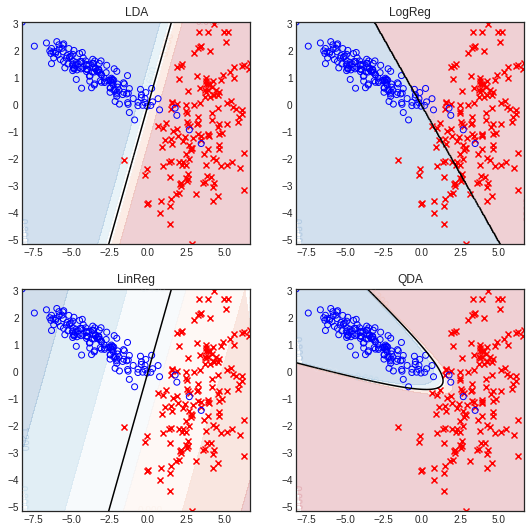

In [ ]:
X_train, y_train = data["train_B"][:, 0:2], data["train_B"][:, -1]
X_test, y_test = data["test_B"][:, 0:2], data["test_B"][:, -1]
# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [LDA(X_train, y_train),LogReg(X_train, y_train),LinReg(X_train, y_train),QDA(X_train, y_train)]
plot_results(X_train, y_train, classifiers)

#### Comparison


In [ ]:
#Train,and test accuracy:
X_train, y_train = data["train_B"][:, 0:2], data["train_B"][:, -1]
X_test, y_test = data["test_B"][:, 0:2], data["test_B"][:, -1]
classifiers=[model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
print(calculate_accuracy(classifiers,data["train_B"][:, 0:2], data["train_B"][:, -1]))
print(calculate_accuracy(classifiers,data["test_B"][:, 0:2], data["test_B"][:, -1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

{1: 0.97, 2: 0.8666666666666667, 3: 0.97, 4: 0.9866666666666667}
{1: 0.9585, 2: 0.8445, 3: 0.9585, 4: 0.98}


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 97 % | 95.85 %
*LogReg* | 86.66 % | 84.45 %
*LinReg* | 97 % | 95.85 %
*QDA* | 98.66 % | 98 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:**

In general the misclassification error on both training and test dataset are very close, and that could be interpreted by the fact that the two databases have the same generation process (Gaussian distribution for both classes). But as we can observe QDA yields higher and closer accuracy on both training and test datasets, because all its assumptions are respected, while for other classifiers there is a small gap between the two missclassification errors.

**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**

- The QDA classifier yields the best accuracy result for both training and test datasets ,and that could be interpreted through the fact that all its  assumptions are totally verified;each class has its own covariance and the features are coming from a multivariate gaussian distribution.

- As remarked also LogReg result is dissimilar from other classifiers results ,because the data is coming from a gaussian generation process which more suitable for LDA,QDA classifiers more than LogReg.

- QDA,LDA,LinReg give almost closer result even though the assumptions of LinReg are violated.


### Dataset C

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

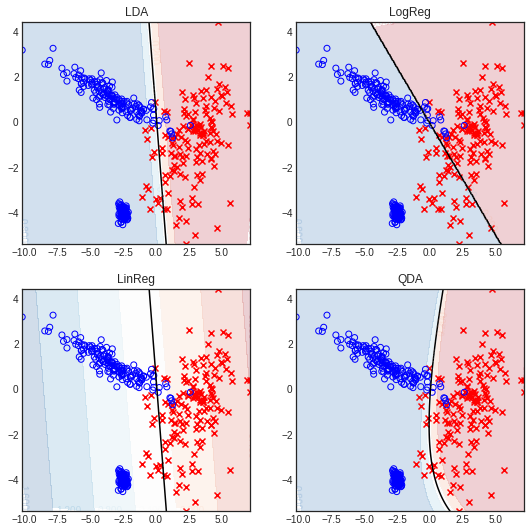

In [ ]:
X_train, y_train = data["train_C"][:, 0:2], data["train_C"][:, -1]
X_test, y_test = data["test_C"][:, 0:2], data["test_C"][:, -1]


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

#### Comparison


In [ ]:
#Train,and test accuracy:
X_train, y_train = data["train_C"][:, 0:2], data["train_C"][:, -1]
X_test, y_test = data["test_C"][:, 0:2], data["test_C"][:, -1]
classifiers=[model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
print(calculate_accuracy(classifiers,data["train_C"][:, 0:2], data["train_C"][:, -1]))
print(calculate_accuracy(classifiers,data["test_C"][:, 0:2], data["test_C"][:, -1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarn

{1: 0.945, 2: 0.87, 3: 0.945, 4: 0.9475}
{1: 0.9576666666666667, 2: 0.8893333333333333, 3: 0.9576666666666667, 4: 0.9616666666666667}


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 94.5 % | 95.76 %
*LogReg* | 87 % | 88.93 %
*LinReg* | 94.5 % | 95.76 %
*QDA* | 94.75 % | 96.16 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:**
The misclassification error on both training and test dataset are very close ,and that could be interpreted by the fact that the two databases have the same generation process (based on Gaussian distribution).More than that on the two databases the percentage of each class is almost the same .For these reasons there wasn't an overfiting.

The test accuracy is more higher than the training one for QDA because of the flexible boundary decision that gives more generalization power.

**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**

- For the dataset C the training and test are generated following a gaussian process ,but each class has its own generation process ,so it is normal that QDA yields the best accuracy in comparison with LDA (not shared covariance assumption is respected ) 

- Logistic regression yields the smallest accuracy result because the mentionned generation process is more suitable for QDA and LDA

- QDA,LDA,LinReg give almost closer results even though the assumptions of LinReg are violated.

